<a href="https://colab.research.google.com/github/JuanCappelletti/Consteel_H06/blob/main/ANALISIS%20FLUIDOS%20GASEOSOS%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
from operator import truediv
import numpy as np
import pandas as pd
url='https://raw.githubusercontent.com/JuanCappelletti/Consteel_H06/main/Trend280922.csv'
datos = pd.read_csv(url,sep=";",decimal=",",index_col=0)
df=pd.DataFrame(datos)
n=160
#df.head()
#df.info()
# segmentan para la curva
for i in range(1,960):
  if i<=160:df1=df.iloc[:160]
  if (i>160 and i<=320):df2=df.iloc[160:320]
  if (i>320 and i<=480):df3=df.iloc[320:480]
  if (i>480 and i<=640):df4=df.iloc[480:640]
  if (i>640 and i<=800):df5=df.iloc[640:800]
  if (i>800 and i<=960):df6=df.iloc[800:960]





In [50]:
import matplotlib.pyplot as plt
def GRAFICAR_Q (T):
  fig, ax = plt.subplots(1, figsize=(60,15))
  fig.suptitle('CAUDAL DE ENTRADA SIDERCA',fontsize=30)
  q=T.FQI161
  x=T.Time
  ax.plot(x,q ,color="Blue",label="FQI_161 entrada")
  p,=ax.plot(x,q,'o',color="red")
  plt.grid(visible=True,which='major',color='#666666',linestyle='-')
  fig.autofmt_xdate()
  plt.show()
def GRAFICAR_P(T):
  fig1, ax0 = plt.subplots(1, figsize=(60,15))
  fig1.suptitle('PRESION DE ENTRADA SIDERCA',fontsize=30)
  p=T.PIR161
  x=T.Time
  ax0.plot(x,p ,color="Blue",label="FQI_161 entrada")
  p,=ax0.plot(x,p,'o',color="red")
  plt.grid(visible=True,which='major',color='#666666',linestyle='-')
  fig1.autofmt_xdate()
  plt.show()

# ***Trends de caudal y presión caudalimetro entrada.***

In [51]:
T=df4

In [ ]:
GRAFICAR_Q(T)

In [ ]:
GRAFICAR_P(T)

# ***Analisis de maximos y minimos***

In [ ]:
print(df.FQI161.describe(),df.PIR161.describe())


In [53]:
n_muestras=10
dfmax=df.nlargest(n_muestras,'PIR161')
#print(dfmax)
dfmin=df.nsmallest(n_muestras,'PIR161')
#print(dfmin)
dfa=df.loc[df.loc[:, 'PIR161'] <= 12.9]
#print(dfa)
print(dfa.nlargest(n_muestras,'PIR161'))

             Date      Time   FQI161  PIR161   FQI165   FQI169  FQI177  \
indice                                                                   
178     28/9/2199   4:25:29  8326.88   12.90  1963.00  4971.67   94.57   
312     28/9/2333   7:46:29  6851.33   12.90  1469.25  3604.75  155.38   
417     28/9/2438  10:23:59  6279.79   12.90   886.20  3623.38  170.81   
782     28/9/2803  19:31:29  5925.41   12.90  2845.56   878.67  195.47   
826     28/9/2847  20:37:29  5937.73   12.90   949.83  3507.67   93.53   
901     28/9/2922  22:29:59  7219.14   12.90  1399.22  3582.63  104.69   
933     28/9/2954  23:17:59  7770.53   12.90   936.70  4279.89  151.56   
421     28/9/2442  10:29:59  6260.50   12.88  2578.36   823.44  177.35   
712     28/9/2733  17:46:29  8111.88   12.88  3675.62  2564.33  159.08   
750     28/9/2771  18:43:29  5809.62   12.88   980.31  2604.78  169.13   

        FQI173   FQI151  
indice                   
178      69.00  1228.64  
312      68.78  1553.17  
417    

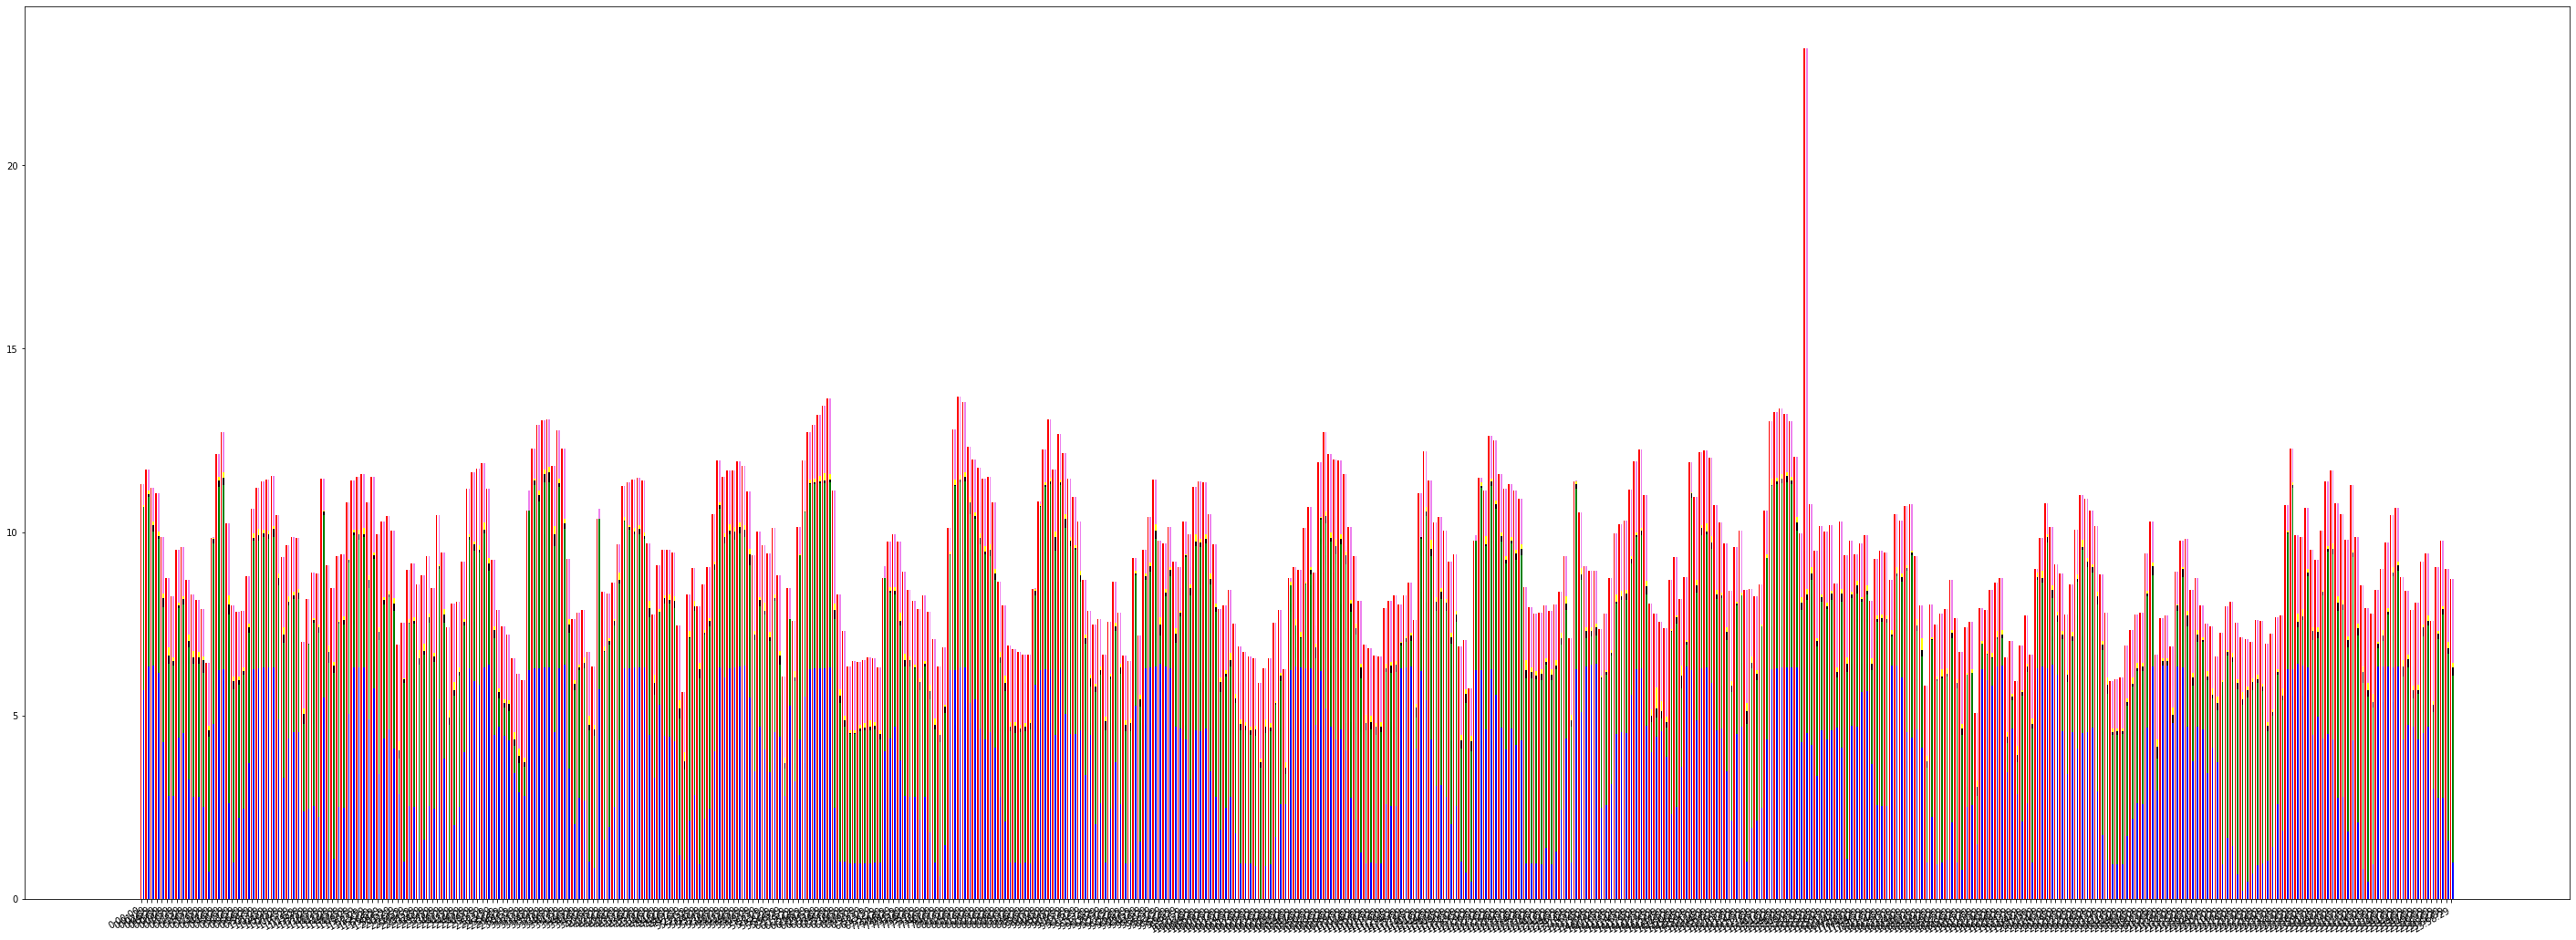

In [54]:


fig3, ax = plt.subplots(1, figsize=(50,20))
bar1=np.arange(len(dfa.Time))
bar2=[i+0.5 for i in bar1]

ax.bar(bar1,dfa.FQI161/1000,0.3,color="red")


ax.bar(bar2,dfa.FQI165/1000,0.3,color="blue")
ax.bar(bar2,dfa.FQI169/1000,0.3,bottom=dfa.FQI165/1000,color="green")
ax.bar(bar2,dfa.FQI177/1000,0.3,bottom=(dfa.FQI165+dfa.FQI169)/1000,color="black")
ax.bar(bar2,dfa.FQI173/1000,0.3,bottom=(dfa.FQI165+dfa.FQI169+dfa.FQI177)/1000,color="yellow")
ax.bar(bar2,dfa.FQI151/1000,0.3,bottom=(dfa.FQI165+dfa.FQI169+dfa.FQI177+dfa.FQI173)/1000,color="violet")
plt.xticks(bar1+0.3/2,dfa.Time)

fig3.autofmt_xdate()

plt.show()